Problem 1:

A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv

[Assume all of the ANOVA assumptions are satisfied]

1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. [both statement and statistical form like Ho=mu, Ha>mu]

1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

1.4) Analyse the effects of one variable on another with the help of an interaction plot.
What is the interaction between the two treatments?
[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') with the variable 'Relief' and state your results.

1.6) Mention the business implications of performing ANOVA for this particular case study.

In [1]:
#Import the library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

#1.1 H0:Null Hypothesis 
     H1: Alternative Hypothesis 


In [2]:
df=pd.read_csv('C:\DATA file\Fever.csv')

In [3]:
df.head()

A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6

In [4]:
df.shape

(36, 4)

In [5]:
df.columns

Index(['A', 'B', 'Volunteer', 'Relief'], dtype='object')

In [6]:
df.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [8]:
df['A']=pd.Categorical(df['A'])
df['B']=pd.Categorical(df['B'])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   A          36 non-null     category
 1   B          36 non-null     category
 2   Volunteer  36 non-null     int64   
 3   Relief     36 non-null     float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 984.0 bytes


# Checking the summary of the dataframe

In [10]:
df.describe(include='all').T

count  unique  top  freq      mean       std  min    25%  50%  \
A           36.0     3.0  3.0  12.0       NaN       NaN  NaN    NaN  NaN   
B           36.0     3.0  3.0  12.0       NaN       NaN  NaN    NaN  NaN   
Volunteer   36.0     NaN  NaN   NaN  2.500000  1.133893  1.0  1.750  2.5   
Relief      36.0     NaN  NaN   NaN  7.183333  3.272090  2.3  4.675  6.0   

             75%   max  
A            NaN   NaN  
B            NaN   NaN  
Volunteer  3.250   4.0  
Relief     9.325  13.5

In [11]:
df.A.value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

# 1.2  Define the hypothesis for 'A' Variable

H0  : The means hour for 'Relief' variable with respect to A at diffrent level is equal.

H1 : The means hour for 'Relief' variable with respect to A at diffrent level is unequal.

# One Way Anova

In [12]:
formula = 'Relief ~ C(A)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


Since the p value is less than the significance level(0.05), we can reject the null hupothesis and states that there is a difference in means hour for 'Relief' variable with respect to A at diffrent level 

# 1.3  Define the hypothesis for 'B' Variable

H0  : The means hour for 'Relief' variable with respect to 'B' at diffrent level is equal.

H1 : The means hour for 'Relief' variable with respect to 'B' at diffrent level is unequal.

In [13]:
formula = 'Relief ~ C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


Since the p value is less than the significance level, we can reject the null hupothesis and states that there is a difference in the The means hour for 'Relief' variable with respect to 'B' at diffrent level 

# 1.4 ANOVA with both 'A' and 'B' variables with respect to the variable 'Relief'

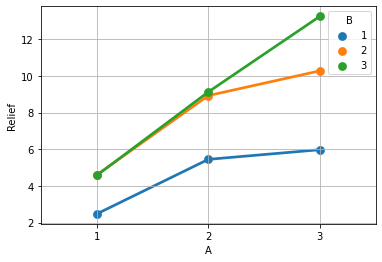

In [14]:
sns.pointplot(x='A', y='Relief',hue='B', data=df, ci=None)
plt.grid()
plt.show()

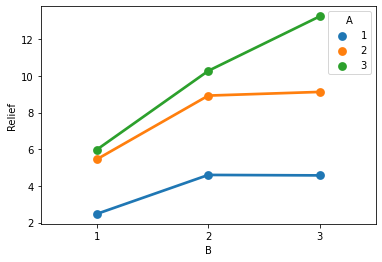

In [15]:
sns.pointplot(x='B', y='Relief',hue='A', data=df, ci=None)
plt.show()

# 1.5 ANOVA with both 'A' and 'B' variables with respect to the variable'Relief'

In [16]:
formula = 'Relief ~ C(A) + C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN


Considering both the factors(A and B), A&B is a significant factor as the p value is <0.05 and Volunteer is not significant as p value >0.5 

In [17]:
#Interaction Effect:
Formula='Relief~C(A)+C(B)+C(A):C(B)'
model=ols(Formula,df).fit()
aov_table=anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


# Problem: 2 

In [18]:
df1=pd.read_csv('C:\DATA file\Education+-+Post+12th+Standard.csv')

In [19]:
df1.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [20]:
df1.shape

(777, 18)

In [21]:
df1.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   A          36 non-null     category
 1   B          36 non-null     category
 2   Volunteer  36 non-null     int64   
 3   Relief     36 non-null     float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 984.0 bytes


In [23]:
#Check the duplicate 

dups=df1.duplicated()
print('No of duplicated rows= %d' % (np.sum(dups)))
df1[dups]

No of duplicated rows= 0


Empty DataFrame
Columns: [Names, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []

# Outlier Treatment
To check for outliers, we will be plotting the box plots.

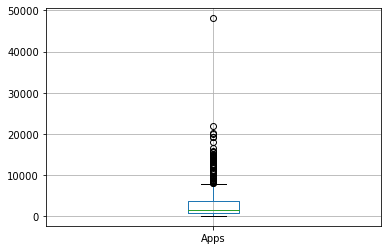

In [27]:
df1.boxplot(column=['Apps'])
plt.show()

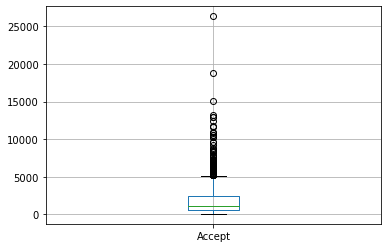

In [28]:
df1.boxplot(column=['Accept'])
plt.show()

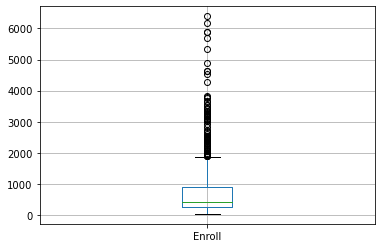

In [29]:
df1.boxplot(column=['Enroll'])
plt.show()

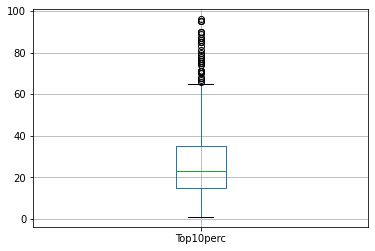

In [30]:
df1.boxplot(column=['Top10perc'])
plt.show()

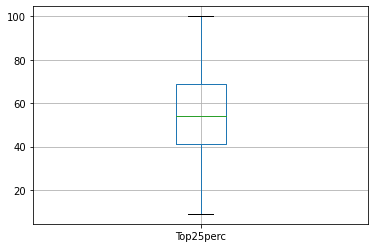

In [31]:
df1.boxplot(column=['Top25perc'])
plt.show()

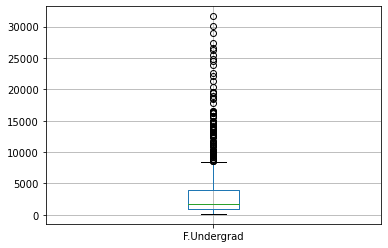

In [32]:
df1.boxplot(column=['F.Undergrad'])
plt.show()

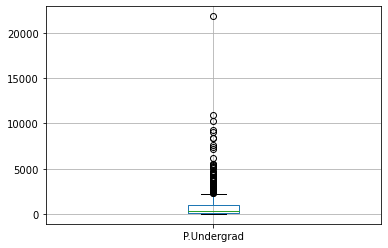

In [33]:
df1.boxplot(column=['P.Undergrad'])
plt.show()

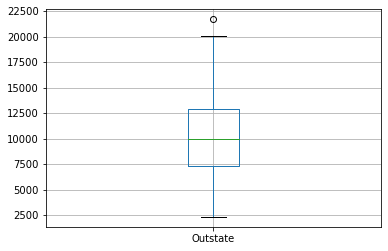

In [34]:
df1.boxplot(column=['Outstate'])
plt.show()

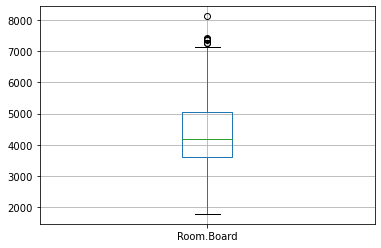

In [35]:
df1.boxplot(column=['Room.Board'])
plt.show()

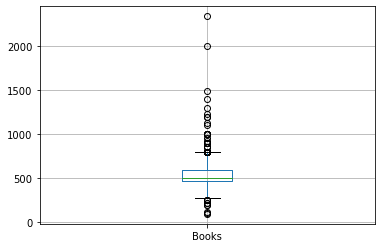

In [36]:
df1.boxplot(column=['Books'])
plt.show()

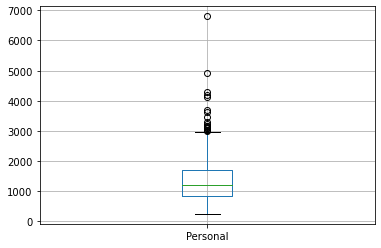

In [37]:
df1.boxplot(column=['Personal'])
plt.show()

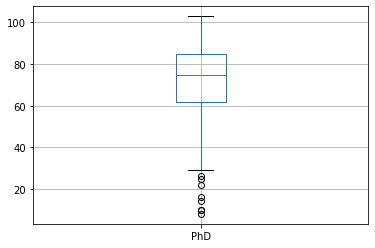

In [38]:
df1.boxplot(column=['PhD'])
plt.show()

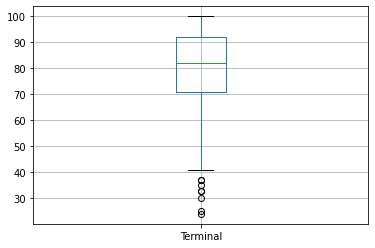

In [39]:
df1.boxplot(column=['Terminal'])
plt.show()

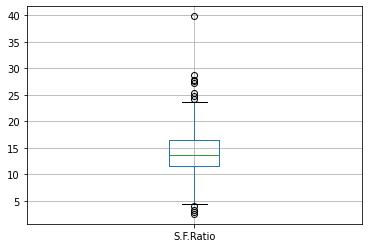

In [40]:
df1.boxplot(column=['S.F.Ratio'])
plt.show()

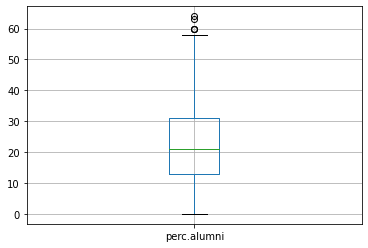

In [41]:
df1.boxplot(column=['perc.alumni'])
plt.show()

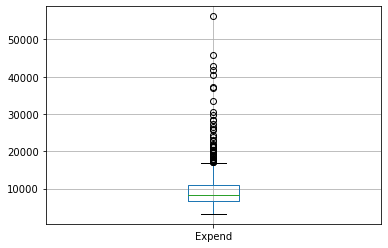

In [42]:
df1.boxplot(column=['Expend'])
plt.show()

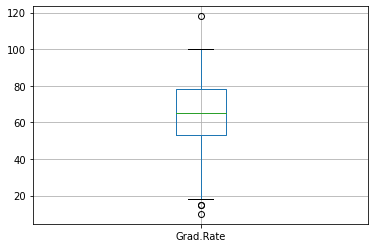

In [43]:
df1.boxplot(column=['Grad.Rate'])
plt.show()

These outliers value needs to be teated and there are several ways of treating them:

Drop the outlier value Replace the outlier value using the IQR

Created a user definded function for finding the lower and upper range for a variable so that outlier can be treated.

In [44]:
 def remove_outlier(col):
        sorted(col)
        Q1,Q3=col.quantile([0.25,0.75])
        IQR=Q3-Q1
        lower_range=Q1-(1.5*IQR)
        upper_range=Q3+(1.5*IQR)
        return lower_range,upper_range

In [47]:
lrAPP,urAPP=remove_outlier(df1['Apps'])
df1['Apps']=np.where(df1['Apps']>urAPP,urAPP,df1['Apps'])
df1['Apps']=np.where(df1['Apps']<lrAPP,lrAPP,df1['Apps'])

lraccept,urinaccept=remove_outlier(df1['Accept'])
df1['Accept']=np.where(df1['Accept']>urinaccept,urinaccept,df1['Accept'])
df1['Accept']=np.where(df1['Accept']<lraccept,lraccept,df1['Accept'])

lrTop10,urTop10=remove_outlier(df1['Top10perc'])
df1['Top10perc']=np.where(df1['Top10perc']>urTop10,urTop10,df1['Top10perc'])
df1['Top10perc']=np.where(df1['Top10perc']<lrTop10,lrTop10,df1['Top10perc'])


lrienroll,urenroll=remove_outlier(df1['Enroll'])
df1['Enroll']=np.where(df1['Enroll']>urenroll,urenroll,df1['Enroll'])
df1['Enroll']=np.where(df1['Enroll']<lrienroll,lrienroll,df1['Enroll'])


lrundergrad,urundergrad=remove_outlier(df1['F.Undergrad'])
df1['F.Undergrad']=np.where(df1['F.Undergrad']>urundergrad,urundergrad,df1['F.Undergrad'])
df1['F.Undergrad']=np.where(df1['F.Undergrad']<lrundergrad,lrundergrad,df1['F.Undergrad'])

lrPundergrad,urPundergrad=remove_outlier(df1['P.Undergrad'])
df1['P.Undergrad']=np.where(df1['P.Undergrad']>urPundergrad,urPundergrad,df1['P.Undergrad'])
df1['P.Undergrad']=np.where(df1['P.Undergrad']<lrPundergrad,lrPundergrad,df1['P.Undergrad'])

lroutstate,uroutstate=remove_outlier(df1['Outstate'])
df1['Outstate']=np.where(df1['Outstate']>uroutstate,uroutstate,df1['Outstate'])
df1['Outstate']=np.where(df1['Outstate']<lroutstate,lroutstate,df1['Outstate'])

lrroomboard,urroomboard=remove_outlier(df1['Room.Board'])
df1['Room.Board']=np.where(df1['Room.Board']>urroomboard,urroomboard,df1['Room.Board'])
df1['Room.Board']=np.where(df1['Room.Board']<lrroomboard,lrroomboard,df1['Room.Board'])

lrbooks,urbooks=remove_outlier(df1['Books'])
df1['Books']=np.where(df1['Books']>urbooks,urbooks,df1['Books'])
df1['Books']=np.where(df1['Books']<lrbooks,lrbooks,df1['Books'])

lrpersonal,urpersonal=remove_outlier(df1['Personal'])
df1['Personal']=np.where(df1['Personal']>urpersonal,urpersonal,df1['Personal'])
df1['Personal']=np.where(df1['Personal']<lrpersonal,lrpersonal,df1['Personal'])

lrPhd,urPhd=remove_outlier(df1['PhD'])
df1['PhD']=np.where(df1['PhD']>urPhd,urPhd,df1['PhD'])
df1['PhD']=np.where(df1['PhD']<lrPhd,lrPhd,df1['PhD'])

lrTerminal,urTerminal=remove_outlier(df1['Terminal'])
df1['Terminal']=np.where(df1['Terminal']>urTerminal,urTerminal,df1['Terminal'])
df1['Terminal']=np.where(df1['Terminal']<lrTerminal,lrTerminal,df1['Terminal'])

lrsfratio,ursfratio=remove_outlier(df1['S.F.Ratio'])
df1['S.F.Ratio']=np.where(df1['S.F.Ratio']>ursfratio,ursfratio,df1['S.F.Ratio'])
df1['S.F.Ratio']=np.where(df1['S.F.Ratio']<lrsfratio,lrsfratio,df1['S.F.Ratio'])

lrpecalumni,urpecalumni=remove_outlier(df1['perc.alumni'])
df1['perc.alumni']=np.where(df1['perc.alumni']>urpecalumni,urpecalumni,df1['perc.alumni'])
df1['perc.alumni']=np.where(df1['perc.alumni']<lrpecalumni,lrpecalumni,df1['perc.alumni'])

lrGradRate,urGradRate=remove_outlier(df1['Grad.Rate'])
df1['Grad.Rate']=np.where(df1['Grad.Rate']>urGradRate,urGradRate,df1['Grad.Rate'])
df1['Grad.Rate']=np.where(df1['Grad.Rate']<lrGradRate,lrGradRate,df1['Grad.Rate'])

lrexp,Urexp=remove_outlier(df1['Expend'])
df1['Expend']=np.where(df1['Expend']>Urexp,Urexp,df1['Expend'])
df1['Expend']=np.where(df1['Expend']<lrexp,lrexp,df1['Expend'])

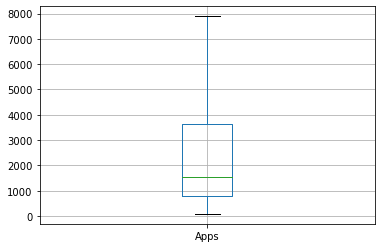

In [49]:
df1.boxplot(column=['Apps'])
plt.show()

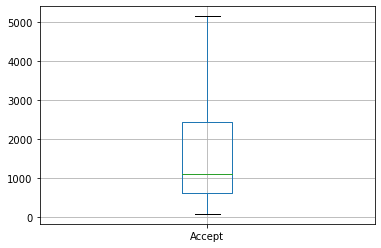

In [50]:
df1.boxplot(column=['Accept'])
plt.show()

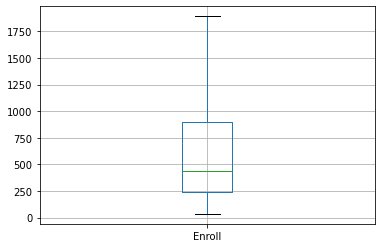

In [51]:
df1.boxplot(column=['Enroll'])
plt.show()

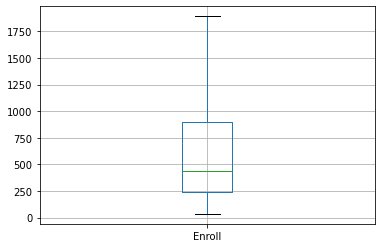

In [52]:
df1.boxplot(column=['Enroll'])
plt.show()

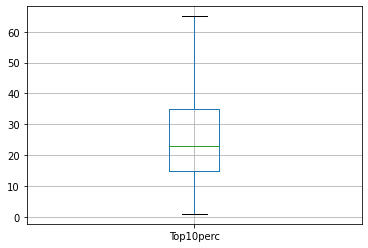

In [53]:
df1.boxplot(column=['Top10perc'])
plt.show()

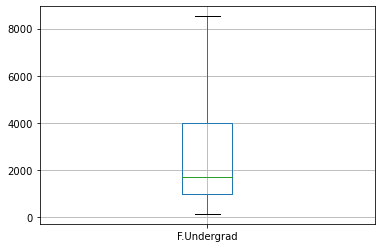

In [54]:
df1.boxplot(column=['F.Undergrad'])
plt.show()

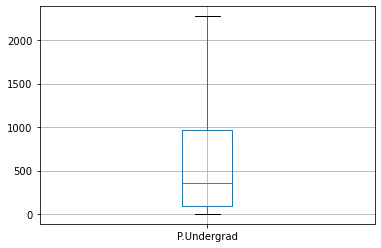

In [55]:
df1.boxplot(column=['P.Undergrad'])
plt.show()

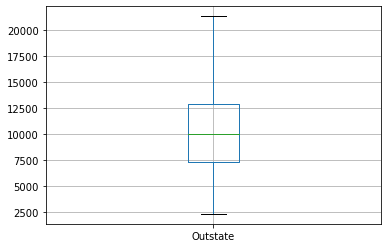

In [56]:
df1.boxplot(column=['Outstate'])
plt.show()

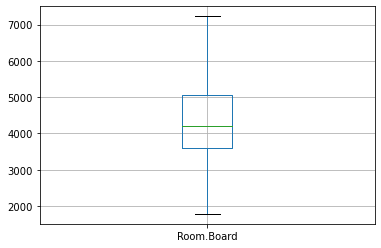

In [57]:
df1.boxplot(column=['Room.Board'])
plt.show()

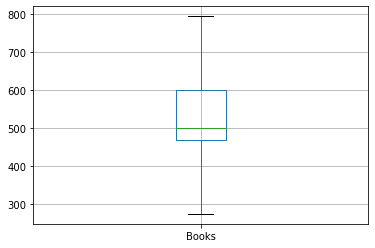

In [58]:
df1.boxplot(column=['Books'])
plt.show()

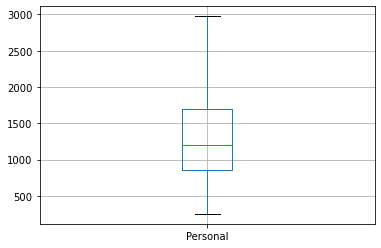

In [59]:
df1.boxplot(column=['Personal'])
plt.show()

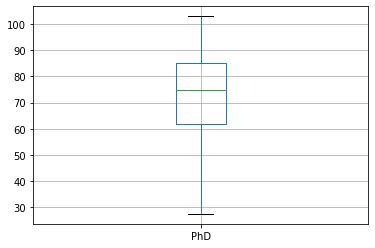

In [60]:
df1.boxplot(column=['PhD'])
plt.show()

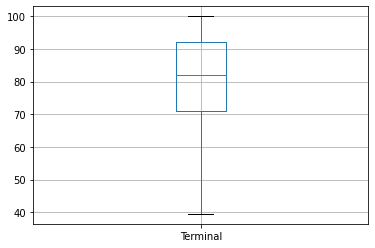

In [61]:
df1.boxplot(column=['Terminal'])
plt.show()

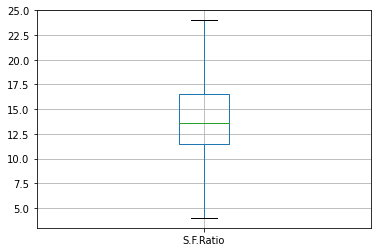

In [62]:
df1.boxplot(column=['S.F.Ratio'])
plt.show()

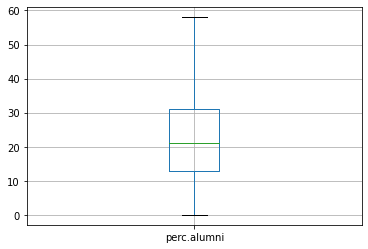

In [63]:
df1.boxplot(column=['perc.alumni'])
plt.show()

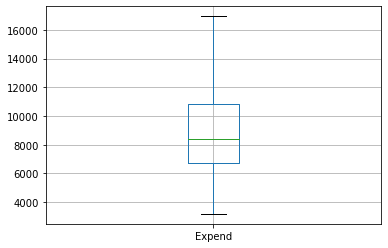

In [64]:
df1.boxplot(column=['Expend'])
plt.show()

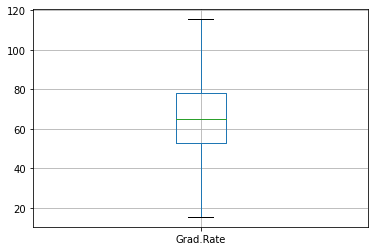

In [65]:
df1.boxplot(column=['Grad.Rate'])
plt.show()

In [71]:
df1.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

# Univariate Analysis

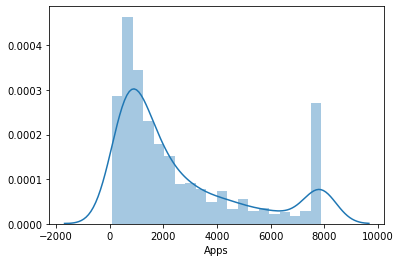

In [67]:
sns.distplot(df1.Apps,bins=20)
plt.show()

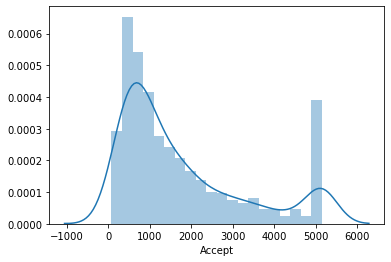

In [68]:
sns.distplot(df1.Accept,bins=20)
plt.show()

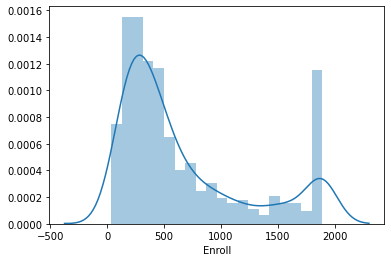

In [69]:
sns.distplot(df1.Enroll,bins=20)
plt.show()

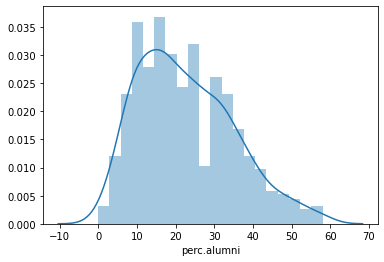

In [70]:
sns.distplot(df1['perc.alumni'],bins=20)
plt.show()


# Bivariate Analysis¶

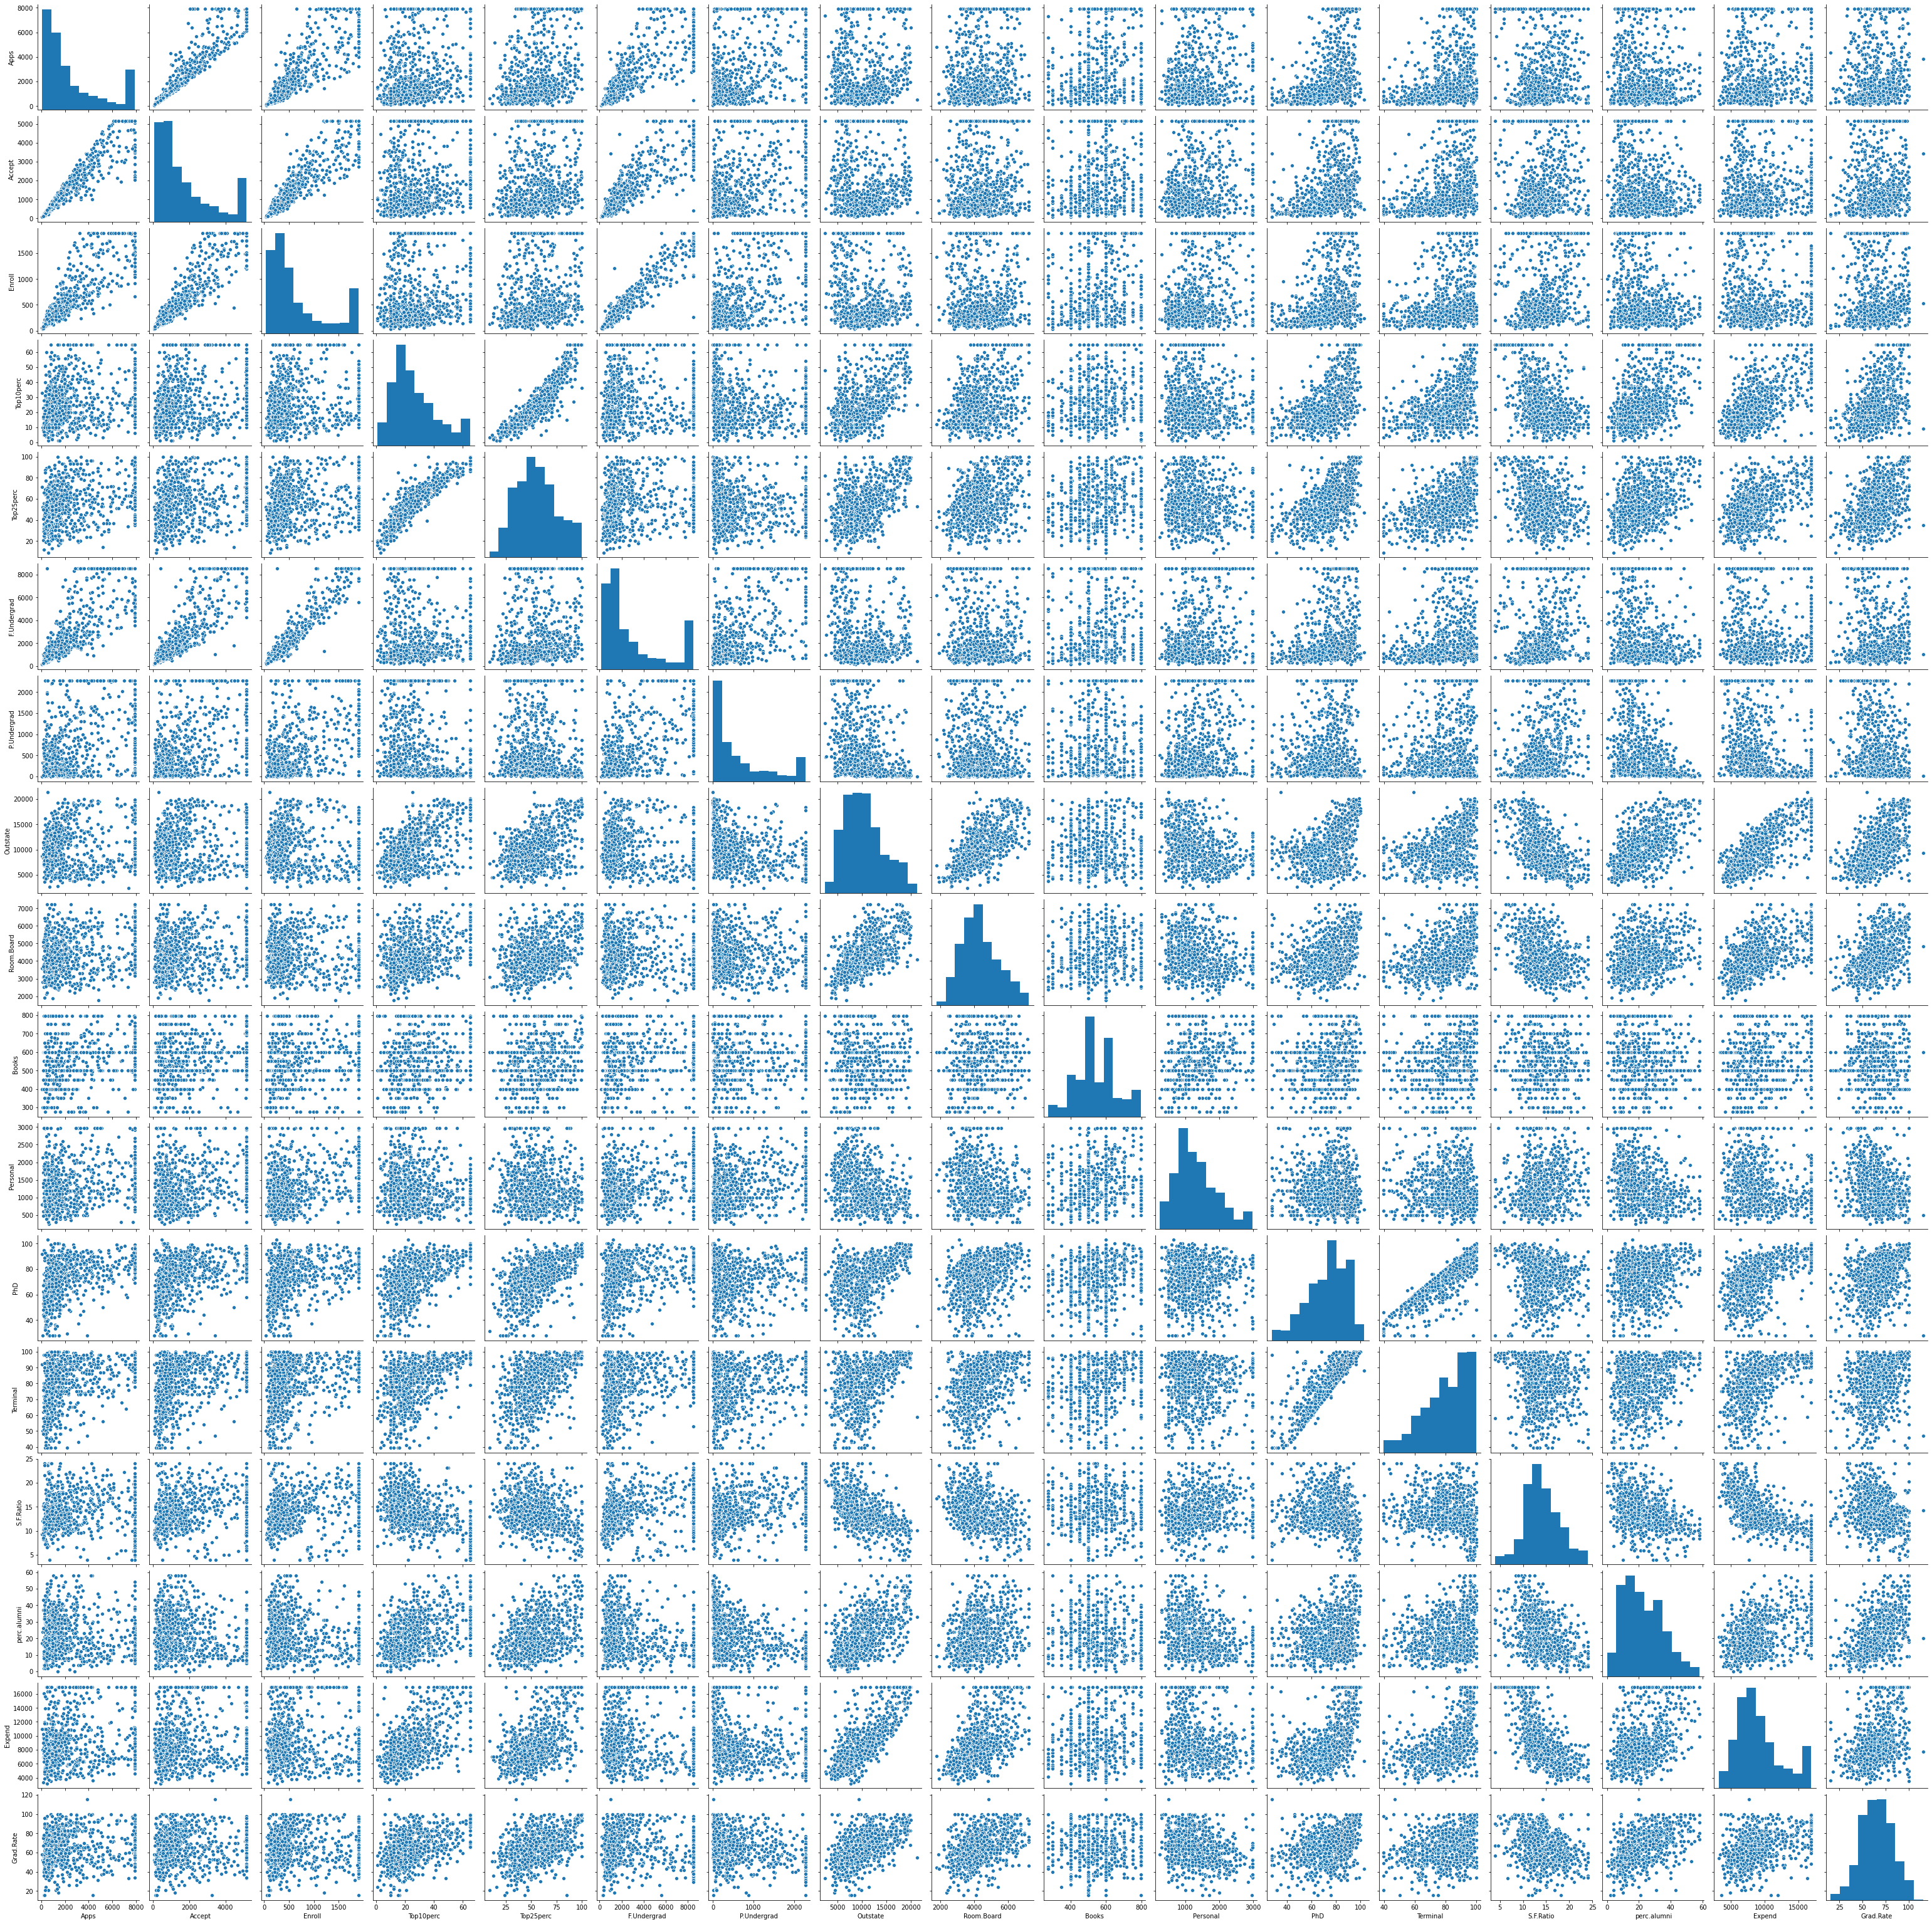

In [73]:
#Pairplot of all variables
sns.pairplot(df1)
plt.show()

A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.

In [74]:
df.corr()

Volunteer   Relief
Volunteer    1.00000 -0.00077
Relief      -0.00077  1.00000

# Correlation Heatmap

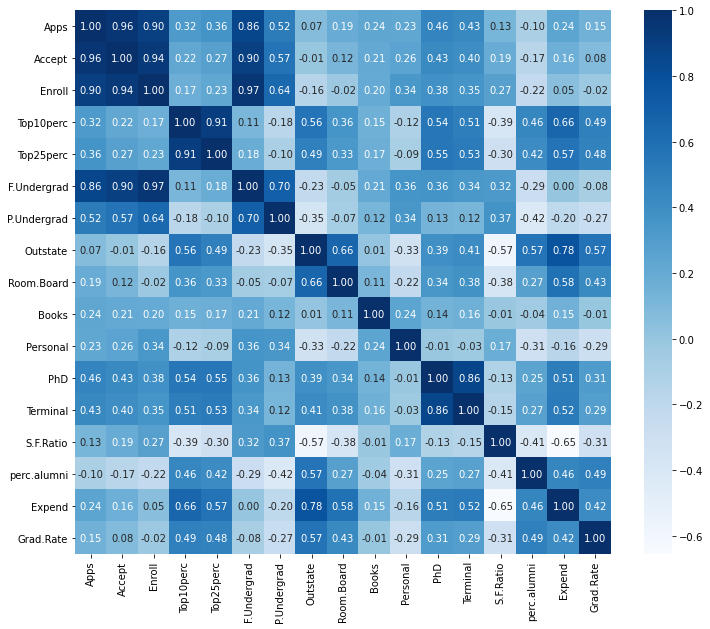

In [75]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(),annot=True,fmt='.2f',cmap='Blues')
plt.show()

In [77]:
# drop the name column because of unique value 
df1.drop('Names',axis=1,inplace=True)


# Standrizing before PCA analysis

In [78]:
# All the variables must be on same scale
from scipy.stats import zscore
New_df=df1.apply(zscore)
New_df.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.376493 -0.337830  0.106380  -0.246780  -0.191827    -0.018769   
1 -0.159195  0.116744 -0.260441  -0.696290  -1.353911    -0.093626   
2 -0.472336 -0.426511 -0.569343  -0.310996  -0.292878    -0.703966   
3 -0.889994 -0.917871 -0.918613   2.129202   1.677612    -0.898889   
4 -0.982532 -1.051221 -1.062533  -0.696290  -0.596031    -0.995610   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.166083 -0.746480   -0.968324 -0.776567  1.438500 -0.174045 -0.123239   
1     0.797856  0.457762    1.921680  1.828605  0.289289 -2.745731 -2.785068   
2    -0.777974  0.201488   -0.555466 -1.210762 -0.260691 -1.240354 -0.952900   
3    -0.828267  0.626954    1.004218 -0.776567 -0.736792  1.205884  1.190391   
4     0.297726 -0.716623   -0.216006  2.219381  0.289289  0.202299 -0.538069   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.070602    -0.870466 -0.630916  -0.319205  
1  -0.489511    -0.545726  0.396097  -0.552693  
2  -0.304413     0.590864 -0.131845  -0.669437  
3  -1.679429     1.159159  2.287940  -0.377577  
4  -0.568839    -1.682316  0.512468  -2.916759

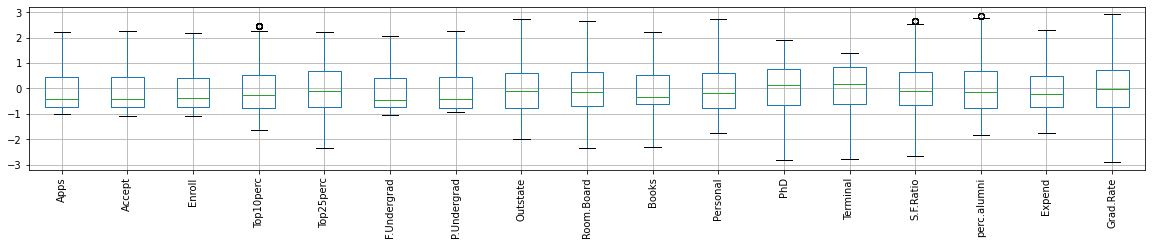

In [79]:
New_df.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

# create a covariance matrix for identify the principal components(PC)

In [80]:
#PCA 
#step-1 create covariance matrix 

cov_matrix=np.cov(New_df.T)
print('Covariance matrix \n%s',cov_matrix)

Covariance matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-

# Comparing correlation covariance matrix

In [82]:
# lets check without scaling corelation matrix 
df_corr=df1.copy()
df_corr.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

In [83]:
# with standrize 
New_df.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

# Identify the Eigenvalues and Eigenvectors

In [84]:
eig_vals,eig_vecs=np.linalg.eig(cov_matrix)
print('eigenvalues id \n%s',eig_vals)
print('\n')
print('eigvector id \n%s',eig_vecs)

eigenvalues id 
%s [5.6625219  4.89470815 1.12636744 1.00397659 0.87218426 0.7657541
 0.58491404 0.5445048  0.42352336 0.38101777 0.24701456 0.02239369
 0.03789395 0.14726392 0.13434483 0.09883384 0.07469003]


eigvector id 
%s [[-2.62171542e-01  3.14136258e-01  8.10177245e-02 -9.87761685e-02
  -2.19898081e-01  2.18800617e-03 -2.83715076e-02 -8.99498102e-02
   1.30566998e-01 -1.56464458e-01 -8.62132843e-02  1.82169814e-01
  -5.99137640e-01  8.99775288e-02  8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01  1.07658626e-01 -1.18140437e-01
  -1.89634940e-01 -1.65212882e-02 -1.29584896e-02 -1.37606312e-01
   1.42275847e-01 -1.49209799e-01 -4.25899061e-02 -3.91041719e-01
   6.61496927e-01  1.58861886e-01  4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01  8.55296892e-02 -9.30717094e-03
  -1.62314818e-01 -6.80794143e-02 -1.52403625e-02 -1.44216938e-01
   5.08712481e-02 -6.48997860e-02 -4.38408622e-02  7.16684935e-01
   2.332

In [85]:
tot=sum(eig_vals) 
var_exp= [(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print('cumulative variance explained \n',cum_var_exp)

cumulative variance explained 
 [ 33.26608367  62.02142867  68.63859223  74.53673619  79.66062886
  84.15926753  87.59551019  90.79435736  93.28246491  95.52086136
  96.97201814  97.83716159  98.62640821  99.20703552  99.64582321
  99.86844192 100.        ]


# scree plot

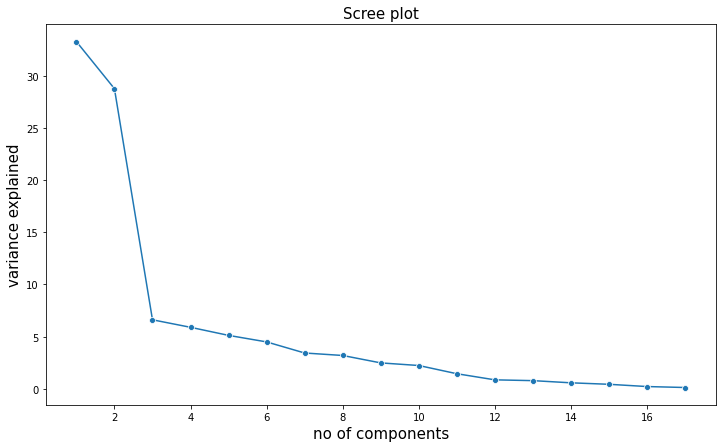

In [86]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('no of components',fontsize=15)
plt.ylabel('variance explained',fontsize=15)
plt.title('Scree plot',fontsize=15)
plt.show()

Visually we can observe ,steep drop in variance explained with increase no of PC's we will proceed with 5 components as 5% increase till 5th components

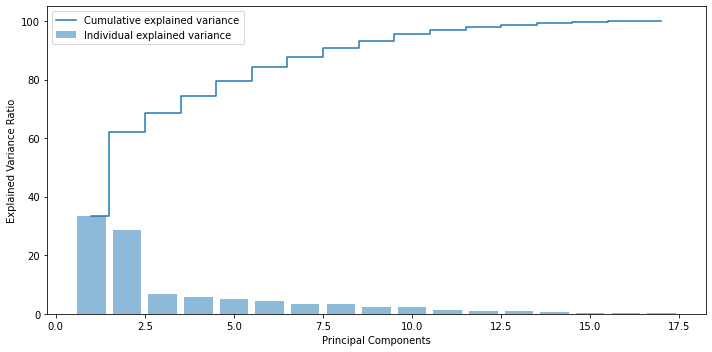

In [87]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

PCA is a statistical technique and uses orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables. PCA also is a tool to reduce multidimensional data to lower dimensions while retaining most of the information. Principal Component Analysis (PCA) is a well-established mathematical technique for reducing the dimensionality of data, while keeping as much variation as possible.

This PCA can only be done on continous variables